In [1]:
function collatz(n)
    print(n)
    while n ∉ (1, 0, -1, -5, -17)
        n = iseven(n) ? n ÷ 2 : 3n + 1
        print("→", n)
    end
end

collatz (generic function with 1 method)

In [2]:
collatz(73)

73→220→110→55→166→83→250→125→376→188→94→47→142→71→214→107→322→161→484→242→121→364→182→91→274→137→412→206→103→310→155→466→233→700→350→175→526→263→790→395→1186→593→1780→890→445→1336→668→334→167→502→251→754→377→1132→566→283→850→425→1276→638→319→958→479→1438→719→2158→1079→3238→1619→4858→2429→7288→3644→1822→911→2734→1367→4102→2051→6154→3077→9232→4616→2308→1154→577→1732→866→433→1300→650→325→976→488→244→122→61→184→92→46→23→70→35→106→53→160→80→40→20→10→5→16→8→4→2→1

In [3]:
collatz(-15)

-15→-44→-22→-11→-32→-16→-8→-4→-2→-1

In [4]:
collatz(-7)

-7→-20→-10→-5

In [5]:
collatz(-50)

-50→-25→-74→-37→-110→-55→-164→-82→-41→-122→-61→-182→-91→-272→-136→-68→-34→-17

In [6]:
collatz(big(2)^73 + 1)

9444732965739290427393→28334198897217871282180→14167099448608935641090→7083549724304467820545→21250649172913403461636→10625324586456701730818→5312662293228350865409→15937986879685052596228→7968993439842526298114→3984496719921263149057→11953490159763789447172→5976745079881894723586→2988372539940947361793→8965117619822842085380→4482558809911421042690→2241279404955710521345→6723838214867131564036→3361919107433565782018→1680959553716782891009→5042878661150348673028→2521439330575174336514→1260719665287587168257→3782158995862761504772→1891079497931380752386→945539748965690376193→2836619246897071128580→1418309623448535564290→709154811724267782145→2127464435172803346436→1063732217586401673218→531866108793200836609→1595598326379602509828→797799163189801254914→398899581594900627457→1196698744784701882372→598349372392350941186→299174686196175470593→897524058588526411780→448762029294263205890→224381014647131602945→673143043941394808836→336571521970697404418→168285760985348702209→504857282956046106

In [7]:
@code_warntype collatz(73)

Variables
  #self#::Core.Const(collatz)
  n@_2::Int64
  n@_3::Int64
  @_4::Int64

Body::Nothing
1 ─       (n@_3 = n@_2)
└──       Main.print(n@_3)
2 ┄ %3  = n@_3::Int64
│   %4  = Core.tuple(1, 0, -1, -5, -17)::Core.Const((1, 0, -1, -5, -17))
│   %5  = (%3 ∉ %4)::Bool
└──       goto #7 if not %5
3 ─ %7  = Main.iseven(n@_3)::Bool
└──       goto #5 if not %7
4 ─       (@_4 = n@_3 ÷ 2)
└──       goto #6
5 ─ %11 = (3 * n@_3)::Int64
└──       (@_4 = %11 + 1)
6 ┄       (n@_3 = @_4)
│         Main.print("→", n@_3)
└──       goto #2
7 ─       return nothing


In [8]:
@code_warntype collatz(big(2)^73 + 1)

Variables
  #self#::Core.Const(collatz)
  n@_2::BigInt
  n@_3::BigInt
  @_4::BigInt

Body::Nothing
1 ─       (n@_3 = n@_2)
└──       Main.print(n@_3)
2 ┄ %3  = n@_3::BigInt
│   %4  = Core.tuple(1, 0, -1, -5, -17)::Core.Const((1, 0, -1, -5, -17))
│   %5  = (%3 ∉ %4)::Bool
└──       goto #7 if not %5
3 ─ %7  = Main.iseven(n@_3)::Bool
└──       goto #5 if not %7
4 ─       (@_4 = n@_3 ÷ 2)
└──       goto #6
5 ─ %11 = (3 * n@_3)::BigInt
└──       (@_4 = %11 + 1)
6 ┄       (n@_3 = @_4)
│         Main.print("→", n@_3)
└──       goto #2
7 ─       return nothing


In [9]:
function collatz_seq(n, maxiters = 10^10)
    s = [n]
    l = 0
    while n > 1 && l < maxiters
        n = iseven(n) ? n ÷ 2 : 3n + 1
        push!(s, n)
        l += 1
    end
    s
end

collatz_seq(73)

116-element Vector{Int64}:
  73
 220
 110
  55
 166
  83
 250
 125
 376
 188
  94
  47
 142
   ⋮
  53
 160
  80
  40
  20
  10
   5
  16
   8
   4
   2
   1

In [10]:
function collatz_length(n, maxiters = 10^10)
    l = 0
    while n > 1 && l < maxiters
        n = iseven(n) ? n ÷ 2 : 3n + 1
        l += 1
    end
    l
end

collatz_length(73)

115

In [11]:
@code_warntype collatz_length(73, 10^10)

Variables
  #self#::Core.Const(collatz_length)
  n@_2::Int64
  maxiters::Int64
  l::Int64
  n@_5::Int64
  @_6::Bool
  @_7::Int64

Body::Int64
1 ──       (n@_5 = n@_2)
└───       (l = 0)
2 ┄─ %3  = (n@_5 > 1)::Bool
└───       goto #4 if not %3
3 ──       (@_6 = l < maxiters)
└───       goto #5
4 ──       (@_6 = false)
5 ┄─       goto #10 if not @_6
6 ── %9  = Main.iseven(n@_5)::Bool
└───       goto #8 if not %9
7 ──       (@_7 = n@_5 ÷ 2)
└───       goto #9
8 ── %13 = (3 * n@_5)::Int64
└───       (@_7 = %13 + 1)
9 ┄─       (n@_5 = @_7)
│          (l = l + 1)
└───       goto #2
10 ─       return l


In [12]:
@code_native debuginfo=:none collatz_length(73, 10^10)

	.text
	pushq	%rbp
	movq	%rsp, %rbp
	xorl	%eax, %eax
	testq	%rdx, %rdx
	jle	L85
	cmpq	$2, %rcx
	jl	L85
	xorl	%eax, %eax
	nopw	%cs:(%rax,%rax)
L32:
	testb	$1, %cl
	jne	L64
	movq	%rcx, %r8
	shrq	$63, %r8
	addq	%rcx, %r8
	sarq	%r8
	movq	%r8, %rcx
	incq	%rax
	cmpq	%rdx, %rax
	jl	L79
	jmp	L85
	nop
L64:
	leaq	(%rcx,%rcx,2), %rcx
	incq	%rcx
	incq	%rax
	cmpq	%rdx, %rax
	jge	L85
L79:
	cmpq	$1, %rcx
	jg	L32
L85:
	popq	%rbp
	retq
	nopw	(%rax,%rax)


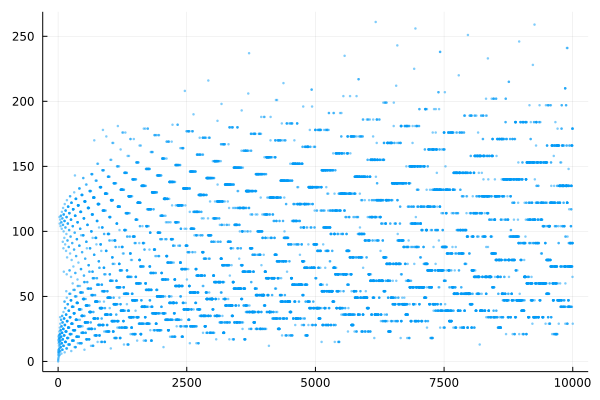

In [13]:
using Plots
n = 1:10^4
scatter(n, collatz_length.(n); label="", ms=1.5, msc=:auto, ma=0.5)